In [3]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

Import Data

In [4]:
mb_raw_data = pd.read_csv('../../data/mann_bruker.txt', sep="\t")
tw_raw_data = pd.read_csv('../../data/tenzer_waters.csv')

mb_clean = mb_raw_data[["CCS", "Ion mobility index", "Sequence", "Charge", "Mass", "Length"]]
del mb_raw_data

tw_clean = tw_raw_data[["sequence", "dt", "charge", "mass"]]
del tw_raw_data

Merge Datasets By Common Sequence

In [5]:
mb_clean = mb_clean.rename(columns={"Sequence": "sequence", "Charge": "charge"})

merged_data = pd.merge(mb_clean, tw_clean, on=["sequence", "charge"])

#just use numeric columns
#numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
#merged_data = merged_data.select_dtypes(include=numerics)

In [6]:
# Calculate the mean of 'column1' and 'column2' per row
merged_data['mass_mean'] = merged_data[['Mass', 'mass']].mean(axis=1)
merged_data = merged_data.drop(["mass", "Mass"], axis=1)
merged_data = merged_data.rename({"mass_mean": "mass"}, axis=1)

In [7]:
merged_data

,CCS,Ion mobility index,sequence,charge,Length,dt,mass
0,5.996674e-36,156,AAAAAAAAAK,1,10,111.248,785.944876
1,5.956918e-36,147,AAAAAAAAAK,1,10,111.248,785.944876
2,5.996673e-36,156,AAAAAAAAAK,1,10,111.248,785.944876
3,5.970114e-36,150,AAAAAAAAAK,1,10,111.248,785.944876
4,5.996675e-36,156,AAAAAAAAAK,1,10,111.248,785.944876
...,...,...,...,...,...,...,...
157014,3.109287e-35,729,YYVTIIDAPGHR,3,12,33.270,1404.225025
157015,3.109287e-35,729,YYVTIIDAPGHR,3,12,33.276,1404.224925
157016,1.631641e-35,522,YYWDIDLDNCVAR,2,13,63.229,1702.251255
157017,1.631641e-35,522,YYWDIDLDNCVAR,2,13,63.877,1702.250505


In [8]:
#merged_data.to_csv('../../data/merged_data.csv')

In [9]:
merged_data_clean = merged_data.groupby(['sequence', 'charge']).agg({'mass':'median', 'CCS':'median','Length':'median', "dt": "median", "Ion mobility index": "median"}).reset_index()
print(merged_data.count())

CCS                   157019
Ion mobility index    157019
sequence              157019
charge                157019
Length                157019
dt                    157019
mass                  157019
dtype: int64


Create Correlation Matrix

<Axes: >

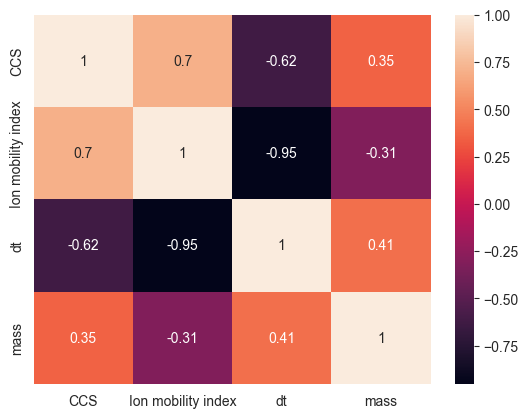

In [10]:

corr_matrix = merged_data[["CCS", "Ion mobility index", "dt", "mass"]].corr(method="spearman")

sn.heatmap(corr_matrix, annot=True)

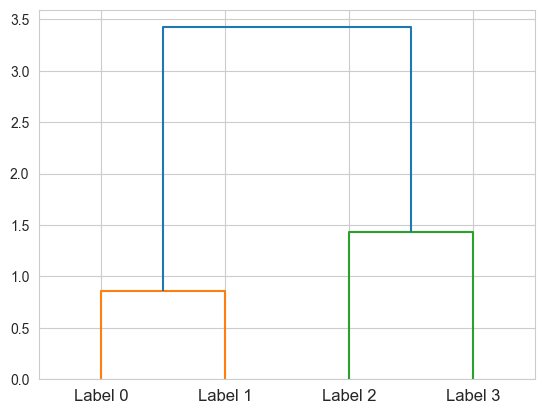

In [11]:
linkage_matrix = sch.linkage(corr_matrix, method="ward")

dendrogram = sch.dendrogram(linkage_matrix, labels=[f'Label {i}' for i in range( corr_matrix.shape[0])])
